In [159]:
#libraries
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings("ignore")

Traceback (most recent call last):
  File "C:\Users\Srijit\Downloads\WPy-3661\python-3.6.6\lib\site-packages\matplotlib\cbook\__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "C:\Users\Srijit\Downloads\WPy-3661\python-3.6.6\lib\site-packages\matplotlib\cbook\__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\Srijit\Downloads\WPy-3661\python-3.6.6\lib\site-packages\matplotlib\backends\backend_nbagg.py", line 241, in <lambda>
    canvas.mpl_connect('close_event', lambda event: Gcf.destroy(num))
  File "C:\Users\Srijit\Downloads\WPy-3661\python-3.6.6\lib\site-packages\matplotlib\_pylab_helpers.py", line 58, in destroy
    cls._activeQue.remove(manager)
ValueError: list.remove(x): x not in list
Traceback (most recent call last):
  File "C:\Users\Srijit\Downloads\WPy-3661\python-3.6.6\lib\site-packages\matplotlib\cbook\__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "C:\Users\Srijit\Downloads\WPy-3661\python-3.6.6\li

In [160]:

#parameters
nx=200
nz=200
nt=1000
dx=10.0
dt=0.001
c0=3000
isx=nx//2
isz=nz//2
ist=100
f0=150.0
T=1.0/f0
isnap=10
nop=5

model_type="fault_zone"

#Receiver Locations"
irx = np.array([60, 80, 100, 120, 140])
irz = np.array([5, 5, 5, 5, 5])
seis = np.zeros((len(irx), nt))

seis=np.zeros((len(irx),nt))

#Inirialize pressure and derivative
pnew=np.zeros((nz,nx))
p=np.zeros((nz,nx))
pold=np.zeros((nz,nx))
pxx=np.zeros((nz,nx))
pzz=np.zeros((nz,nx))



In [161]:

#Initialize velocity model
c=np.zeros((nz,nx))
if model_type=="homogeneous":
    c=c+c0
elif model_type=="fault_zone":
    c=c+c0
    c[:,nx//2-5:nx//2+5]*=0.8
cmax=c.max()


In [162]:
time=np.arange(nt)
time=time*dt
src=np.zeros(nt+1)
for it in range(nt):
    src[it]=np.exp((-1/T**2) * ((it-ist)*dt)**2)
src=np.diff(src)/dt
src[nt-1]=0


<IPython.core.display.Javascript object>


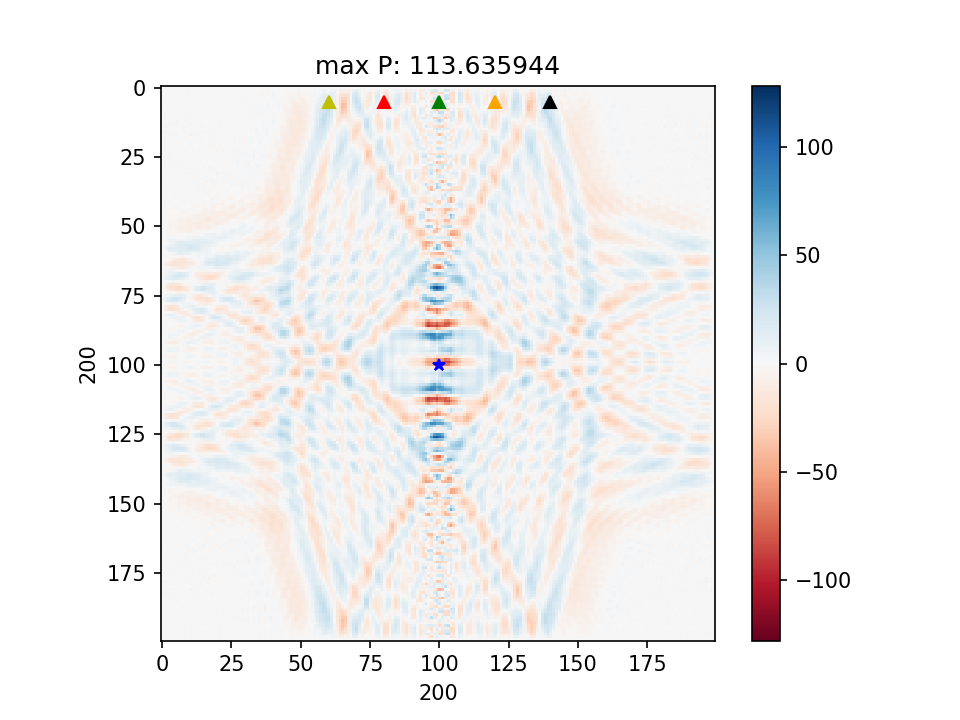

Courant Criteria is 0.300000


In [163]:

#Plot
v=max([np.abs(src.min()),np.abs(src.max())])
#Initialize animated plot
image=plt.imshow(pnew,interpolation='nearest',animated=True,vmin=-v,vmax=v,cmap=plt.cm.RdBu)

#Plot the receivers
plt.plot(irx[0],irz[0],'y^')
plt.plot(irx[1],irz[1],'r^')
plt.plot(irx[2],irz[2],'g^')
plt.plot(irx[3],irz[3],'^',color='orange')
plt.plot(irx[4],irz[4],'^',color='black')

#Plot Source
plt.plot(isx,isz,'b*')

plt.colorbar()
plt.xlabel(nx)
plt.ylabel(nz)

ir=np.arange(len(irx))

print("Courant Criteria is %f" %(cmax*dt/dx))


In [164]:
#Time loop

dz=dx
nop=3
for it in range(nt):
    if nop==3:
        for i in range(1,nx-1):
            pxx[:,i]=(p[:,i-1] - 2*p[:,i] + p[:,i+1])/(dx**2)
        for i in range(1,nz-1):
            pzz[i,:]=(p[i-1,:] - 2*p[i,:] + p[i+1,:])/(dz**2)
    if nop==5:
        for i in range(2,nx-2):
            pxx[:,i]=((-1/12.0) * p[:,i-2] + (4/3.0) * p[:,i-1] - (5/2.0) * p[:,i] + (4/3.0) * p[:,i+1] - (1/12.0) * p[:,i+2])/(dx**2)
        for i in range(2,nz-2):
            pzz[i,:]=((-1/12.0) * p[i-2,:] + (4/3.0) * p[i-1,:] - (5/2.0) * p[i,:] + (4/3.0) * p[i+1,:] - (1/12.0) * p[i+2,:])/(dz**2)
    pnew = 2*p - pold + (c**2 * dt**2)*(pxx + pzz)
    pnew[isz,isx] = pnew[isz,isx] + src[it]
    pold=p
    p=pnew
    seis[ir,it] = p[irz[ir],irx[ir]]
    if it%isnap==0:
        plt.title("max P: %f" %(p.max()))
        image.set_data(p)
        plt.gcf().canvas.draw()

#print("%f"%(seis[ir[0],5]))

<IPython.core.display.Javascript object>


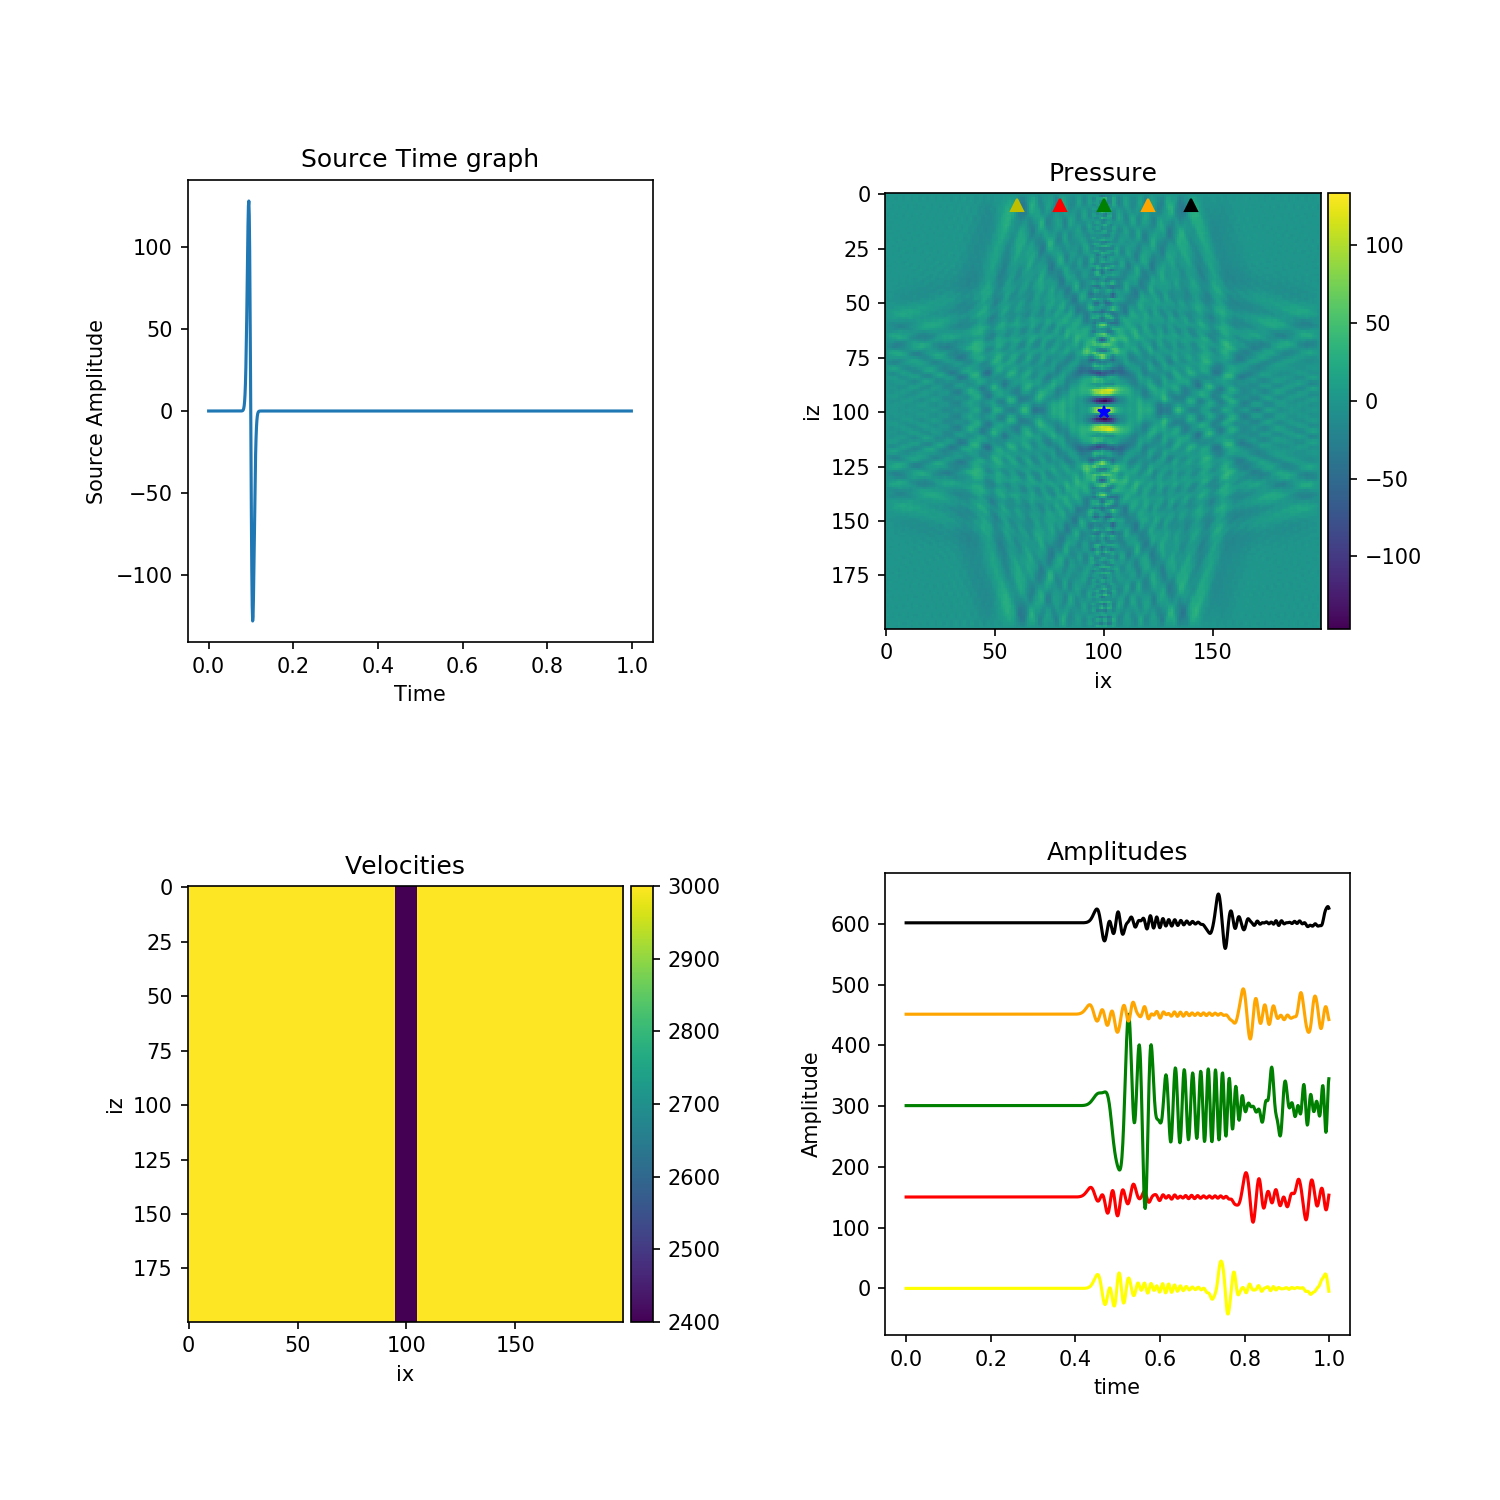

In [165]:
plt.ioff()
#Plotting source time function
fig3=plt.figure(figsize=(10,10))
grid=gridspec.GridSpec(2,2,width_ratios=[1,1],wspace=0.5,hspace=0.5)
ax1=plt.subplot(grid[0,0])
ax1.plot(time,src)
ax1.set_xlabel('Time')
ax1.set_ylabel('Source Amplitude')
ax1.set_title('Source Time graph')
ax2=plt.subplot(grid[0,1])
#Plot the receivers
im5=ax2.imshow(p)
ax2.plot(irx[0],irz[0],'y^')
ax2.plot(irx[1],irz[1],'r^')
ax2.plot(irx[2],irz[2],'g^')
ax2.plot(irx[3],irz[3],'^',color='orange')
ax2.plot(irx[4],irz[4],'^',color='black')
ax2.set_title('Pressure')
ax2.set_xlabel('ix')
ax2.set_ylabel('iz')
div=make_axes_locatable(ax2)
cax=div.append_axes("right", size="5%", pad=0.05) # size & position of colorbar
fig3.colorbar(im5, cax=cax)
#Plot Source
ax2.plot(isx,isz,'b*')
ax3=plt.subplot(grid[1,0])
im4=ax3.imshow(c)
ax3.set_title('Velocities')
div=make_axes_locatable(ax3)
cax=div.append_axes("right", size="5%", pad=0.05) # size & position of colorbar
fig3.colorbar(im4, cax=cax)
ax3.set_xlabel('ix')
ax3.set_ylabel('iz')
ax4=plt.subplot(grid[1,1])
ymax=seis.ravel().max()
ax4.set_title('Amplitudes')
ax4.plot(time,seis[ir[0]],color='yellow')
ax4.plot(time,seis[ir[1]]+ymax,color='red')
ax4.plot(time,seis[ir[2]]+ymax*2,color='green')
ax4.plot(time,seis[ir[3]]+ymax*3,color='orange')
ax4.plot(time,seis[ir[4]]+ymax*4,color='black')
ax4.set_xlabel('time')
ax4.set_ylabel('Amplitude')
plt.show()